# 🔖 Project Structure for KNN-based Book Recommendation

# 📘 Introduction

In a world filled with millions of books, finding the right one can be overwhelming. A recommendation system solves this problem by suggesting books tailored to a user’s interests.

This project builds a **Book Recommendation System** using the **K-Nearest Neighbours (KNN)** algorithm. It analyzes user ratings and suggests books that are similar in taste and popularity.

---

## 🎯 Objectives
- ✅ Display the **Top 20 Most Popular Books** in the dataset.
- ✅ Recommend **5 Books** similar to a user-entered book using KNN.

---

## 🗂️ Dataset Description

We use three datasets:

| Dataset | Description |
|--------|-------------|
| 📘 Books | Book metadata (title, author, publisher, year) |
| ⭐ Ratings | User ratings of books (0–10 scale) |
| 👤 Users | User demographics (location, age) |

---

## Why KNN?

KNN is a simple yet effective algorithm that finds similar books based on user ratings. It doesn’t require training and works well for item-to-item recommendations.

---


In [41]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

---
# 🔍 Data Preparation

### 1. Load the Datasets

We are working with three datasets:
- Books metadata (`Books`)
- User book ratings (`Ratings`)
- User demographic information (`Users`)


In [42]:
Books = pd.read_csv("Books.csv", low_memory=False)
Ratings = pd.read_csv("Ratings.csv")
Users = pd.read_csv("Users.csv")

### 1.1 View Dataset Columns

Let's confirm the column names in each dataset.


In [43]:
print("Books Columns:", Books.columns.tolist())
print("Ratings Columns:", Ratings.columns.tolist())
print("Users Columns:", Users.columns.tolist())

Books Columns: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Ratings Columns: ['User-ID', 'ISBN', 'Book-Rating']
Users Columns: ['User-ID', 'Location', 'Age']


### 1.2 Dataset Structure and Null Check

Check the basic structure and count of missing values in each dataset.

In [44]:
Books.info()
Ratings.info()
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

In [45]:
print("Total null cells in Books:", Books.isnull().sum().sum())
print("Total null cells in Ratings:", Ratings.isnull().sum().sum())
print("Total null cells in Users:", Users.isnull().sum().sum())

# Nulls per column
print("\nNulls per column in Books:")
print(Books.isnull().sum())

print("\nNulls per column in Ratings:")
print(Ratings.isnull().sum())

print("\nNulls per column in Users:")
print(Users.isnull().sum())

Total null cells in Books: 7
Total null cells in Ratings: 0
Total null cells in Users: 110762

Nulls per column in Books:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Nulls per column in Ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Nulls per column in Users:
User-ID          0
Location         0
Age         110762
dtype: int64


### 1.3 Dataset Previews

Below are the first few rows from each dataset:

- **Books Dataset**
- **Ratings Dataset**
- **Users Dataset**


In [46]:
Books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [47]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [48]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### 1.4 Fill Missing Book-Author and Publisher Fields (Manually)

A few rows are missing critical fields like `Book-Author` and `Publisher`. We will manually fill them using ISBN.

In [49]:
missing_rows = Books[Books['Book-Author'].isnull()]
missing_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [50]:
missing_rows1 = Books[Books['Publisher'].isnull()]
missing_rows1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [51]:
Books.loc[Books.ISBN == '0751352497', ['Book-Author', 'Publisher']] = ['DK', 'Dorling Kindersley Publishers Ltd']
Books.loc[Books.ISBN == '9627982032', ['Book-Author', 'Publisher']] = ['Larissa Anne Downe', 'Edinburgh Financial Publishing']
Books.loc[Books.ISBN == '193169656X', ['Book-Author', 'Publisher']] = ['Elaine Corvidae', 'NovelBooks, Inc.']
Books.loc[Books.ISBN == '1931696993', ['Book-Author', 'Publisher']] = ['Linnea Sinclair', 'Novelbooks, Incorporated']

In [52]:
selected_isbns = [
    '0751352497',
    '9627982032',
    '193169656X',
    '1931696993'
]
Books_filtered = Books[Books['ISBN'].isin(selected_isbns)][['ISBN', 'Book-Author', 'Publisher']]
Books_filtered


,ISBN,Book-Author,Publisher
118033,0751352497,DK,Dorling Kindersley Publishers Ltd
128890,193169656X,Elaine Corvidae,"NovelBooks, Inc."
129037,1931696993,Linnea Sinclair,"Novelbooks, Incorporated"
187689,9627982032,Larissa Anne Downe,Edinburgh Financial Publishing


### 1.5 Additional Cleaning Steps

To further clean the dataset, we apply the following transformations:

- **Image URLs**: We fill missing values in `Image-URL-L` using `Image-URL-M`, and drop the smaller versions (`Image-URL-S` and `Image-URL-M`) as they are unnecessary for recommendation logic.

- **User Age Filtering**: We filter users to include only those aged between 5 and 100 to remove unrealistic entries (e.g., age 0 or 244).

- **Rating Value Filtering**: Ratings with a value of 0 are considered implicit (i.e., no actual feedback). We remove these entries to retain only meaningful, explicit user ratings.

- **Year of Publication Correction**: The `Year-Of-Publication` column may contain invalid entries (e.g., non-numeric values). We:
  1. Convert it to numeric (invalid values become NaN),
  2. Fill missing years with the median year,
  3. Convert the result to integers.

In [53]:
Books['Image-URL-L'] = Books['Image-URL-L'].fillna(Books['Image-URL-M'])
Books.drop(['Image-URL-S', 'Image-URL-M'], axis=1, inplace=True)

In [54]:
print("Before:", Users.shape)
Users = Users[(Users['Age'] >= 5) & (Users['Age'] <= 100)]
print("After:", Users.shape)

Before: (278858, 3)
After: (166848, 3)


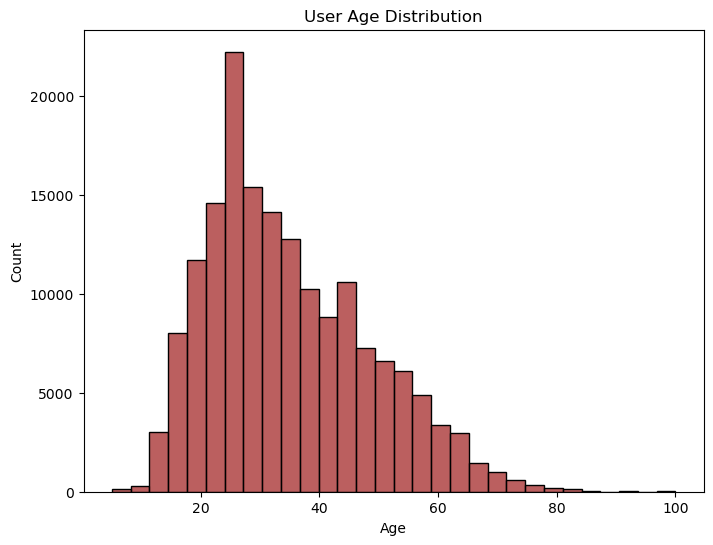

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(Users['Age'], bins=30, kde=False, color='brown')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [56]:
print("Before:", Ratings.shape)
Ratings = Ratings[Ratings["Book-Rating"] != 0]
print("After:", Ratings.shape)

Before: (1149780, 3)
After: (433671, 3)


In [57]:
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].fillna(Books['Year-Of-Publication'].median())
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].astype(int)

### 1.6 Merge Ratings with Book Metadata

We merge the Ratings and Books datasets on the `ISBN` column to enrich rating records with book information.

In [58]:
ratings_books = Ratings.merge(Books, on='ISBN')
ratings_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383842 entries, 0 to 383841
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              383842 non-null  int64 
 1   ISBN                 383842 non-null  object
 2   Book-Rating          383842 non-null  int64 
 3   Book-Title           383842 non-null  object
 4   Book-Author          383842 non-null  object
 5   Year-Of-Publication  383842 non-null  int64 
 6   Publisher            383842 non-null  object
 7   Image-URL-L          383842 non-null  object
dtypes: int64(3), object(5)
memory usage: 23.4+ MB


### 1.7 Summary

At the end of this stage:

- All datasets are successfully loaded and cleaned.
- Missing or incorrect values have been addressed:
  - Critical fields like `Book-Author`, `Publisher`, and `Year-Of-Publication` were corrected or imputed.
  - Unnecessary image columns have been removed.
- Unrealistic user ages have been filtered out, keeping only users aged 5–100.
- The merged dataset (`ratings_books`) is ready for further analysis.

The final counts of rows and missing values are shown below:

In [59]:
summary = pd.DataFrame({
    'Books': [Books.shape[0], Books.isnull().sum().sum()],
    'Ratings': [Ratings.shape[0], Ratings.isnull().sum().sum()],
    'Users': [Users.shape[0], Users.isnull().sum().sum()]
}, index=['Total Rows', 'Missing Values'])

summary

,Books,Ratings,Users
Total Rows,271360,433671,166848
Missing Values,0,0,0


### 1.8 Filter Books and Users

To reduce noise and improve the quality of recommendations, we apply filtering to remove:
- Books with fewer than 25 ratings, since such books may not have enough data to support meaningful recommendations.
- Users who have rated fewer than 10 books, as they might not provide enough signal for collaborative filtering.

This step helps in focusing the model on more active users and more popular books.

In [60]:
# Filter books with at least 35 ratings
book_counts = ratings_books['Book-Title'].value_counts()
popular_books = book_counts[book_counts >= 35].index
ratings_books = ratings_books[ratings_books['Book-Title'].isin(popular_books)]

# Filter users with at least 10 ratings
user_counts = ratings_books['User-ID'].value_counts()
active_users = user_counts[user_counts >= 10].index
ratings_books = ratings_books[ratings_books['User-ID'].isin(active_users)]

# Print summary
print(" Filtered Data Summary:")
print("- Rows:", len(ratings_books))
print("- Books:", ratings_books['Book-Title'].nunique())
print("- Users:", ratings_books['User-ID'].nunique())

 Filtered Data Summary:
- Rows: 32292
- Books: 1066
- Users: 1503


---

# 🧠 Exploratory Data Analysis (EDA)

### EDA Roadmap:

- 📊 Distribution of Ratings  
- 📚 Most Rated Books  
- ⭐ Top Rated Books (with minimum votes)  
- 👥 Most Active Users  
- 🗓️ Year of Publication Distribution




### 📊 Rating Distribution

This section explores how users rate books. Understanding the frequency of each rating value helps assess whether the dataset is biased toward positive, negative, or neutral feedback.

C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\49822927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=ratings_books, palette='viridis')


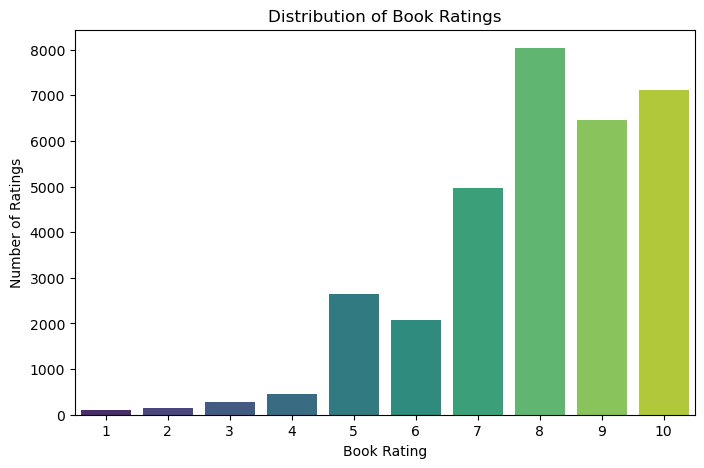

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Book-Rating', data=ratings_books, palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.show()

### 📚 Most Rated Books

We identify the books that received the highest number of user ratings. These books are typically more popular or widely read and are strong candidates for inclusion in a recommendation system.

C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\1389674495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette='magma')


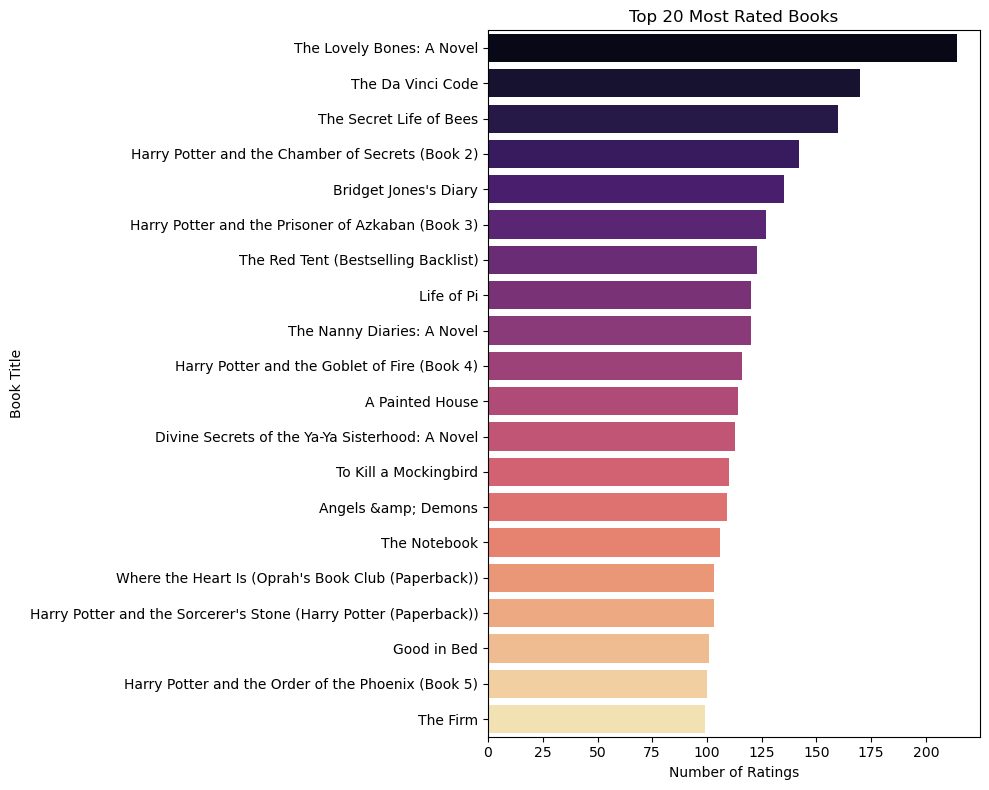

In [62]:
top_rated_books = ratings_books['Book-Title'].value_counts().head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette='magma')
plt.title('Top 20 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


### ⭐ Top Rated Books (with at least 50 Ratings)

To ensure fairness, we filter books with at least 50 ratings and then rank them by average rating. This helps surface books that are not only well-liked but also reliably reviewed.

C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\720469636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_books['mean'], y=top_avg_books.index, palette='coolwarm')


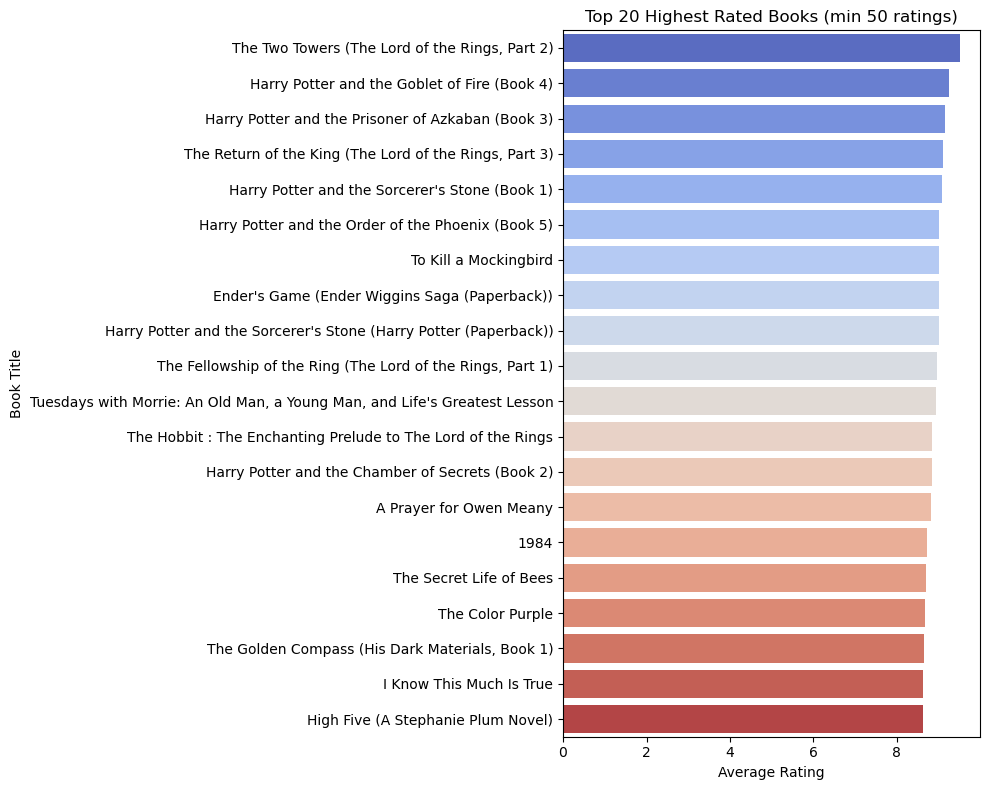

In [63]:
rating_stats = ratings_books.groupby('Book-Title')['Book-Rating'].agg(['count', 'mean'])
rating_stats_filtered = rating_stats[rating_stats['count'] >= 50]
top_avg_books = rating_stats_filtered.sort_values(by='mean', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_avg_books['mean'], y=top_avg_books.index, palette='coolwarm')
plt.title('Top 20 Highest Rated Books (min 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


The table below summarizes the difference between popularity and quality when evaluating books for recommendation.

| 🔍 Criteria          | 📊 Most Rated Books                         | ⭐ Top Rated Books                             |
|----------------------|---------------------------------------------|------------------------------------------------|
| Metric               | Number of ratings                           | Average rating                                 |
| Represents           | **Popularity**                              | **Reader satisfaction**                        |
| Main Risk            | May be well-known but not well-liked        | May be biased by very few users                |
| Good for             | Suggesting popular books to new users       | Recommending quality books to active users     |
| Filtering Required   | Optional                                    | **Yes – needs minimum ratings (e.g., ≥50)**    |


### 👥 Most Active Users

We identify users with the highest number of ratings.  
To avoid bias from outliers, we filter out users with extremely high activity (e.g., over 300 ratings).  
This helps keep the recommendation system fair and balanced.


C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\3095758073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=active_users.values, y=active_users.index, palette='cubehelix')


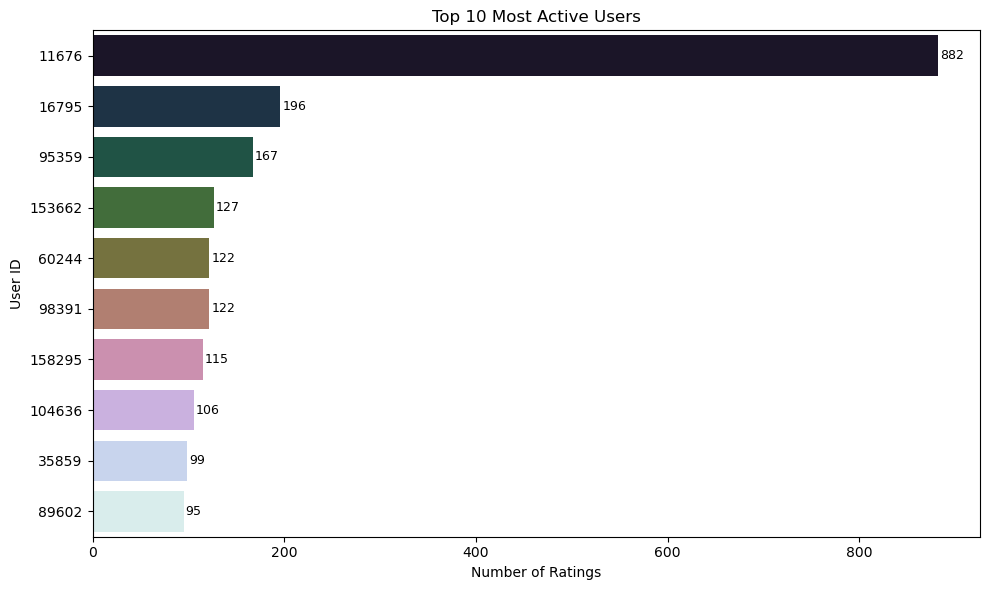

In [64]:
active_users = ratings_books['User-ID'].value_counts().head(10)
active_users.index = active_users.index.astype(str)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=active_users.values, y=active_users.index, palette='cubehelix')

for i, value in enumerate(active_users.values):
    ax.text(value + 2, i, str(value), va='center', fontsize=9, color='black')

plt.title('Top 10 Most Active Users')
plt.xlabel('Number of Ratings')
plt.ylabel('User ID')
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\3369796807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users_before.values, y=top_users_before.index, palette='Blues_r', ax=axes[0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\3369796807.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users_after.values, y=top_users_after.index, palette='Blues_r', ax=axes[1])


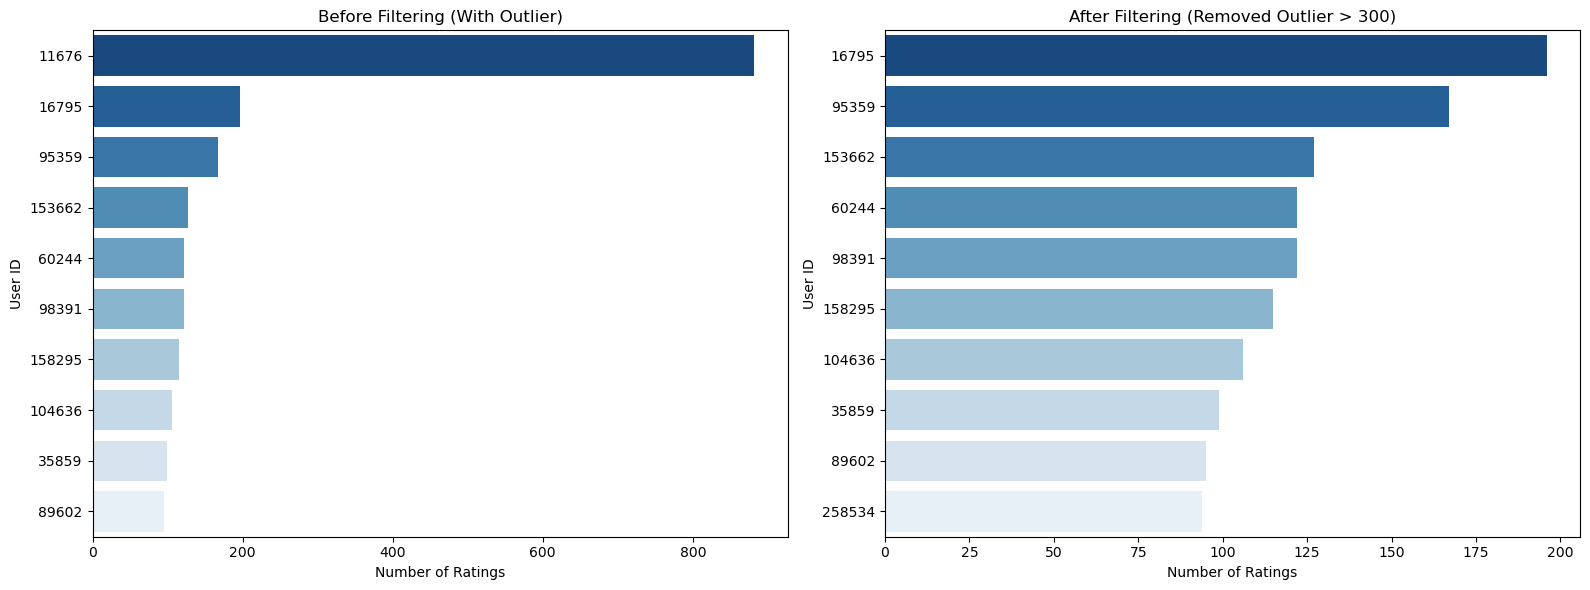

In [65]:
top_users_before = ratings_books['User-ID'].value_counts().head(10)
top_users_before.index = top_users_before.index.astype(str)

top_users_after = ratings_books['User-ID'].value_counts()
top_users_after = top_users_after[top_users_after < 300].head(10)
top_users_after.index = top_users_after.index.astype(str)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=top_users_before.values, y=top_users_before.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Before Filtering (With Outlier)')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('User ID')

sns.barplot(x=top_users_after.values, y=top_users_after.index, palette='Blues_r', ax=axes[1])
axes[1].set_title('After Filtering (Removed Outlier > 300)')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('User ID')

plt.tight_layout()
plt.show()

### 🗓️ Year of Publication Distribution

We analyze the distribution of books across publication years to identify trends in the dataset, such as concentration in certain decades or the presence of outdated entries.


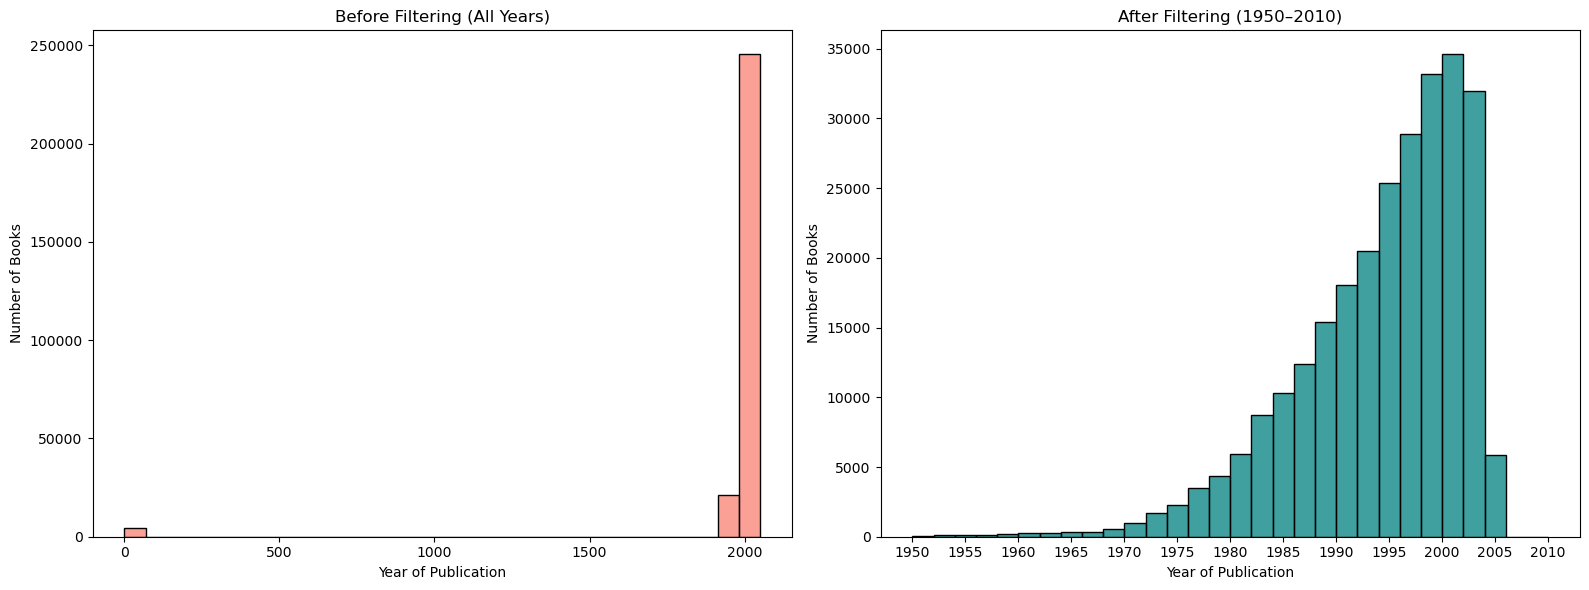

In [66]:
# Before Filtering
years_all = Books['Year-Of-Publication']

# After Filtering
filtered_years = Books[
    (Books['Year-Of-Publication'] >= 1950) &
    (Books['Year-Of-Publication'] <= 2010)
]['Year-Of-Publication']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Before ---
sns.histplot(years_all, bins=30, color='salmon', ax=axes[0])
axes[0].set_title('Before Filtering (All Years)')
axes[0].set_xlabel('Year of Publication')
axes[0].set_ylabel('Number of Books')

# --- After ---
sns.histplot(filtered_years, bins=30, color='teal', ax=axes[1])
axes[1].set_title('After Filtering (1950–2010)')
axes[1].set_xlabel('Year of Publication')
axes[1].set_ylabel('Number of Books')
axes[1].set_xticks(np.arange(1950, 2011, 5))

plt.tight_layout()
plt.show()

---
# 📈 Build KNN-Based Recommendation System

We build a recommendation system using the K-Nearest Neighbors (KNN) algorithm. The goal is to recommend books similar to a given book based on user rating patterns.

#### Steps:
1. Create a pivot table of books and users.
2. Convert the pivot table into a sparse matrix to optimize memory.
3. Apply KNN using cosine similarity.
4. Build a function that recommends similar books based on a user-input title.


### Step 1: Create User-Book Pivot Table

We create a matrix with book titles as rows, user IDs as columns, and the ratings as values. Missing ratings are filled with 0.


In [67]:
book_user_matrix = ratings_books.pivot_table(
    index='Book-Title',
    columns='User-ID',
    values='Book-Rating'
).fillna(0)

book_user_matrix.head()

User-ID,243,254,638,805,882,1131,1424,1435,1733,2033,...,275970,276050,276165,276231,276680,277427,278026,278194,278202,278633
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3rd Degree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Step 2: Convert to Sparse Matrix

To optimize memory and computation, we convert the pivot table to a sparse matrix format using `csr_matrix`.


In [68]:
book_user_sparse = csr_matrix(book_user_matrix.values)

### Step 3: Initialize KNN Model

We initialize a K-Nearest Neighbors model using cosine similarity and brute-force search. The number of neighbors is set to 20.


In [69]:
knn_model = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=20,
    n_jobs=-1
)
knn_model.fit(book_user_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

## Book Recommendation & Evaluation

This section includes two key functions used in our recommendation system:

- **`recommend_books()`**:  
  Suggests similar books based on a given input title using KNN and cosine similarity.  
  Displays the top similar books with similarity scores.

- **`evaluate_recommendations()`**:  
  Evaluates recommendation quality using Precision@k and Recall@k.  
  It compares the recommended books to those highly rated by users who liked the input book.


C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=similar_books, palette="crest")
C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:26: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


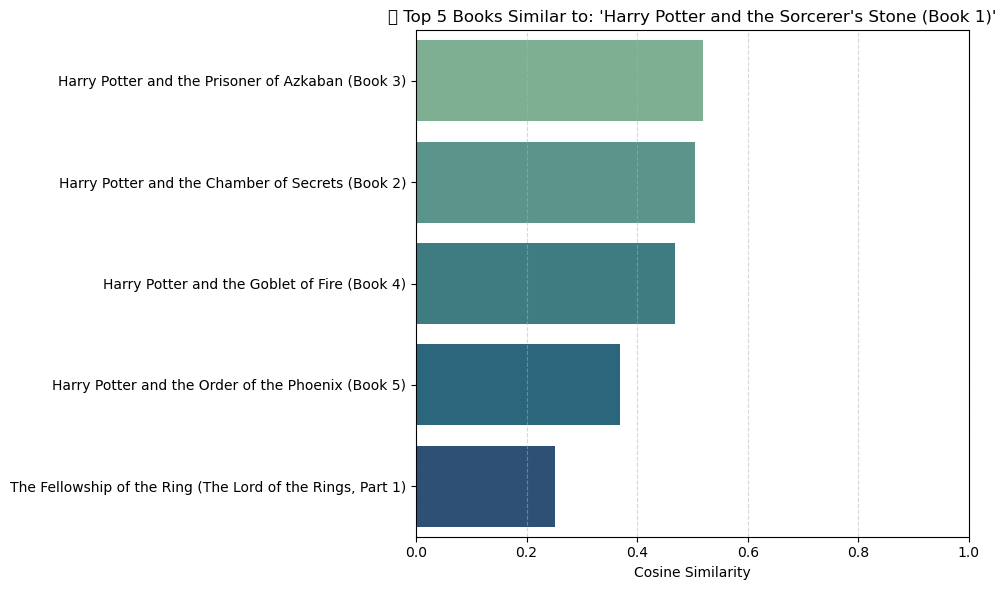

In [70]:
def recommend_books(book_title, n=5):
    if book_title not in book_user_matrix.index:
        print("❌ Book not found.")
        return

    # Get the index of the book
    index = book_user_matrix.index.get_loc(book_title)

    # Get distances and indices of similar books
    distances, indices = knn_model.kneighbors(
        book_user_matrix.iloc[index, :].values.reshape(1, -1),
        n_neighbors=n + 1
    )

    # Get book titles and similarity scores
    similar_books = [book_user_matrix.index[i] for i in indices.flatten()[1:]]
    similarity_scores = [1 - distances.flatten()[i] for i in range(1, len(distances.flatten()))]

    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=similarity_scores, y=similar_books, palette="crest")
    plt.xlabel("Cosine Similarity")
    plt.title(f"📚 Top {n} Books Similar to: '{book_title}'")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
recommend_books("Harry Potter and the Sorcerer's Stone (Book 1)", n=5)



In [71]:
def evaluate_recommendations(book_name, pivot_table, model, k=5, threshold=7):
    """
    Evaluate the quality of book recommendations using Precision@k and Recall@k.

    Parameters:
    - book_name (str): Title of the input book.
    - pivot_table (DataFrame): User-book rating pivot table.
    - model: Trained KNN model.
    - k (int): Number of neighbors to consider.
    - threshold (int): Rating threshold to consider a book 'relevant'.

    Returns:
    - precision (float): Precision@k score.
    - recall (float): Recall@k score.
    """
    if book_name not in pivot_table.index:
        return None, None

    # Get top-k recommendations
    book_id = pivot_table.index.get_loc(book_name)
    distances, indices = model.kneighbors(
        pivot_table.iloc[book_id, :].values.reshape(1, -1),
        n_neighbors=k + 1
    )
    recommended_books = [
        pivot_table.index[indices.flatten()[i]]
        for i in range(1, len(distances.flatten()))
    ]

    # Identify users who rated the input book highly
    relevant_users = pivot_table.columns[pivot_table.loc[book_name] >= threshold]

    # Get all books these users rated highly
    relevant_books = set()
    for user in relevant_users:
        high_rated_books = pivot_table.index[pivot_table[user] >= threshold].tolist()
        relevant_books.update(high_rated_books)

    relevant_books.discard(book_name)  # Exclude the input book from relevance set

    # Compute precision and recall
    true_positives = len(set(recommended_books).intersection(relevant_books))
    precision = true_positives / len(recommended_books) if recommended_books else 0
    recall = true_positives / len(relevant_books) if relevant_books else 0

    return precision, recall


## Evaluate Recommendation Quality

We assess the effectiveness of our recommendation system by computing **Precision@5** and **Recall@5** for a few representative books.

### Evaluation Setup
- **Test books**: Popular titles used to evaluate model accuracy.
- **k**: Number of similar books to retrieve = 5  
- **Threshold**: Ratings ≥ 7 are considered relevant

### Output
The table below shows how well the recommended books match what users have highly rated.


In [72]:
# Define a list of representative books for evaluation
test_books = [
    "The Da Vinci Code",
    "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
    "To Kill a Mockingbird",
    "The Lovely Bones: A Novel",
    "Life of Pi"
]

# Evaluate precision@k and recall@k for each book in the list
evaluation_results = []

for book in test_books:
    precision, recall = evaluate_recommendations(
        book_name=book,
        pivot_table=book_user_matrix,
        model=knn_model,
        k=5,
        threshold=7
    )

    if precision is not None:
        evaluation_results.append({
            "Book": book,
            "Precision@5": precision,
            "Recall@5": recall
        })

# Compile results into a DataFrame
eval_df = pd.DataFrame(evaluation_results)

# Display evaluation summary
eval_df

,Book,Precision@5,Recall@5
0,The Da Vinci Code,1.0,0.005035
1,Harry Potter and the Sorcerer's Stone (Harry P...,1.0,0.005258
2,To Kill a Mockingbird,1.0,0.005263
3,The Lovely Bones: A Novel,1.0,0.005076
4,Life of Pi,1.0,0.005875


C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=similar_books, palette="crest")
C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:26: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


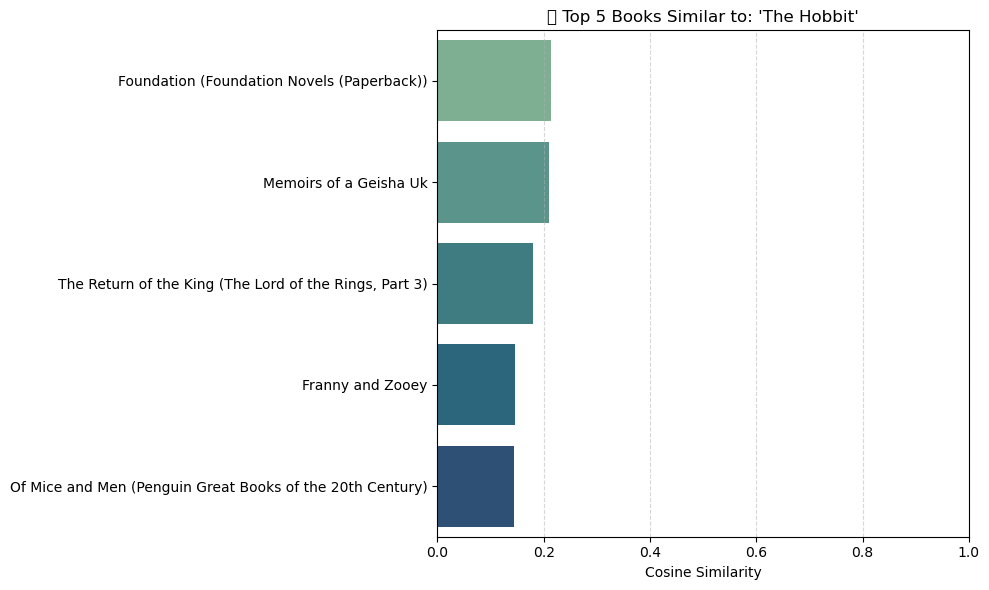

C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=similar_books, palette="crest")
C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:26: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


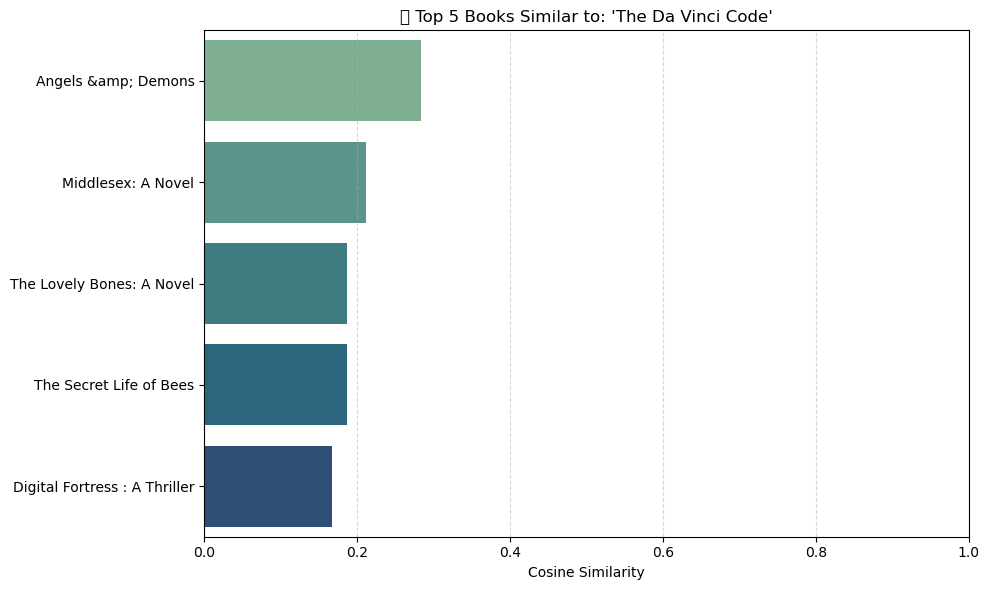

C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=similar_books, palette="crest")
C:\Users\Asus\AppData\Local\Temp\ipykernel_26512\4188488280.py:26: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


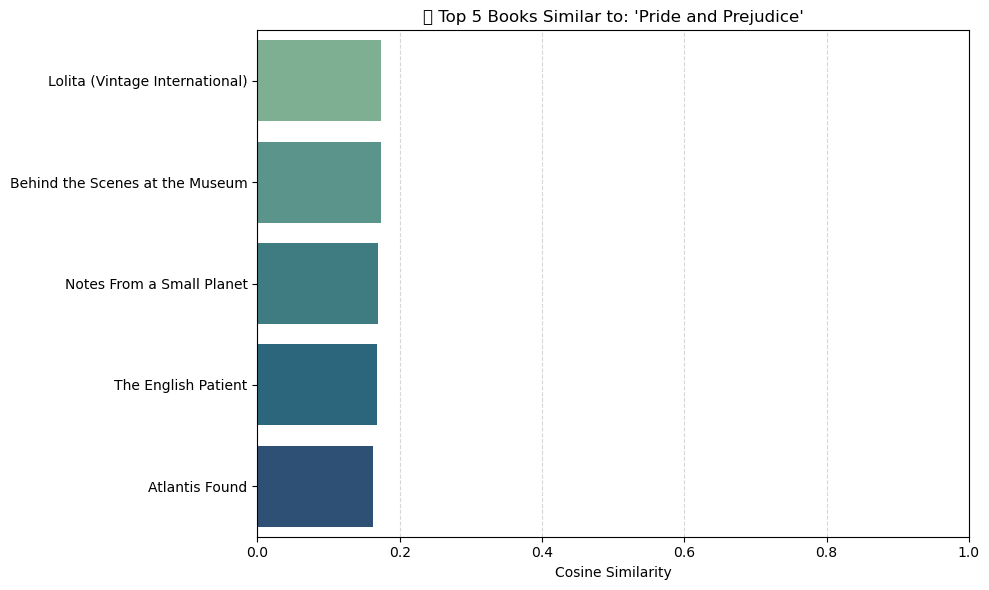

In [79]:
sample_books = [
    "The Hobbit",
    "The Da Vinci Code",
    "Pride and Prejudice"
]

for book in sample_books:
    recommend_books(book_title=book, n=5)

### 📘 Book Recommendation with User Input

- The input book is matched against the dataset.
- The model returns the most similar books with their similarity scores.
- Each recommended book is shown with its title and cover image.


In [81]:
# Select 5 random book titles
sample = ratings_books['Book-Title'].sample(n=5).tolist()
sample


['The Last Precinct',
 'The Notebook',
 'Mind Prey',
 'The Reader',
 'A Child Called \\It\\": One Child\'s Courage to Survive"']

In [82]:
from IPython.display import display, HTML, Image

def recommend_books_with_prompt(knn_model, book_user_matrix, books_df, n_recommendations=5):
    book_title = input("📖 Enter a book title: ").strip()

    if book_title not in book_user_matrix.index:
        print(f"❌ Book '{book_title}' not found in the dataset.")
        return

    index = book_user_matrix.index.get_loc(book_title)
    distances, indices = knn_model.kneighbors(
        book_user_matrix.iloc[index, :].values.reshape(1, -1),
        n_neighbors=n_recommendations + 1
    )

    print(f"\n📘 Recommendations for: '{book_title}':\n")

    for i in range(1, len(indices.flatten())):
        similar_book = book_user_matrix.index[indices.flatten()[i]]
        similarity_score = 1 - distances.flatten()[i]

        # Match book for image
        image_row = books_df[books_df['Book-Title'].str.strip().str.lower() == similar_book.strip().lower()]
        image_url = image_row['Image-URL-L'].values
        image_url = image_url[0] if len(image_url) > 0 else None

        # Display
        display(HTML(f"<strong>{i}. {similar_book}</strong> <br>Similarity: {similarity_score:.2f}<br>"))
        if image_url:
            display(Image(url=image_url, width=120))
        else:
            display(HTML("<em>No image available.</em>"))
        display(HTML("<hr style='margin-top:10px;'>"))

In [83]:
# Run it
recommend_books_with_prompt(knn_model, book_user_matrix, Books, n_recommendations=5)


📘 Recommendations for: 'Mind Prey':



### Save KNN Model and Pivot Table

Save the trained KNN model and user-book matrix for later reuse or deployment.

In [77]:
import joblib

joblib.dump(knn_model, 'knn_model.pkl')
book_user_matrix.to_pickle('book_user_matrix.pkl')